Горошков Даниил РК6-61Б

Задача:
Реализовать и исследовать математическую модель Вольтерра - Лотки для имитации межвидового взаимодействия. Сформулировать критерий "устойчивости" биологической системы на основе численности особей на произвольно заданном интервале моделирования. Отыскать экстремум предложенного критерия как функции 4-х параметров модели.

Модель Лотки-Вольтерры - это простая популяционная модель описываемая следующими уравнениями:
dx/dt = (𝛼 - 𝛽y)x
dy/dt = (-𝛾 + 𝛿x)y,
где x - количество "жертв", y - количество "хищников", 𝛼 - коэффициент прироста жертв, 𝛽 - коэффициент смертности жертв, 𝛾 - коэффициент смертности хищников, 𝛿 - коэффициент прироста хищников. Это очень простая модель и не отражает реальной ситуации в природе, однако она очень хорошо отражает влияние взаимосвязанных функций друг на друга.

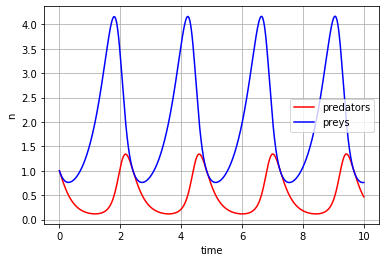

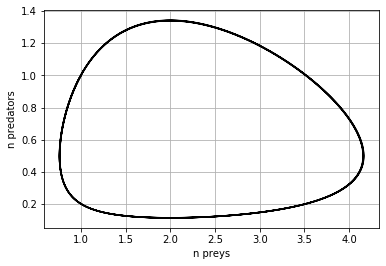

In [5]:
import matplotlib.pyplot as plt
import numpy as np


class Biome(object):

  def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.0001):
    self._dt = dt
    self._n_iters = int(tmax / dt)
    # Intial state
    self.pred_init = pred_init
    self.prey_init = prey_init
    # Data arrays
    self.time = None
    self.prey = None
    self.pred = None

  def run(self, alpha, beta, delta, gamma):
    """
    Simulation settings:
        alpha - prey growth
        beta - prey mortality
        delta - predator growrh
        gamma - predator mortality
    """
    self.time = np.zeros(self._n_iters)
    self.prey = np.zeros(self._n_iters)
    self.pred = np.zeros(self._n_iters)
    self.prey[0] = self.prey_init
    self.pred[0] = self.pred_init
    # Lotka-Volterra equations
    for i in range(self._n_iters - 1):
      self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (alpha - self.pred[i] * beta)
      self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (delta * self.prey[i] - gamma)
    self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))
    return self.time, self.prey, self.pred

  def plot(self):
    plt.xlabel('time')
    plt.ylabel('n')
    plt.plot(self.time, self.pred, label='predators', color='r')
    plt.plot(self.time, self.prey, label='preys', color='b')
    plt.legend()
    plt.grid()
    plt.show()

  def plot_cycle(self):
    plt.ylabel('n predators')
    plt.xlabel('n preys')
    plt.plot(self.prey, self.pred, color='black')
    plt.grid()


biome = Biome(tmax=10)
biome.run(2, 4, 2, 4)
biome.plot()
biome.plot_cycle()

Сперва следует провести анализ того, как влияет изменение одного параметра на математическую модель. В модели Лотки-Вольтерры 4 параметра. Начнём изменение с параметра 𝛼 - увеличим его в несколько раз (в 4 раза).

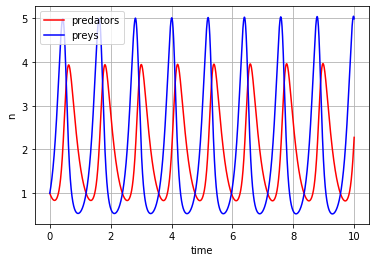

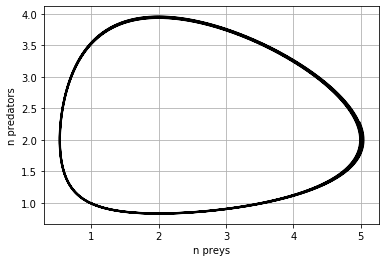

In [6]:
biome = Biome(tmax=10)
biome.run(8, 4, 2, 4)
biome.plot()
biome.plot_cycle()

Увеличение 𝛼 приводит к увеличению частоты примерно в 2 раза, так как увеличивается скорость роста жертв, что позволяет им быстрее восстанавливаться после сильного истребления. Также увеличивается пиковое значение жертв и хищников.
Далее увеличим 𝛽 в несколько раз (в 4 раза).

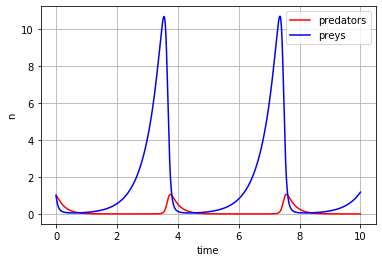

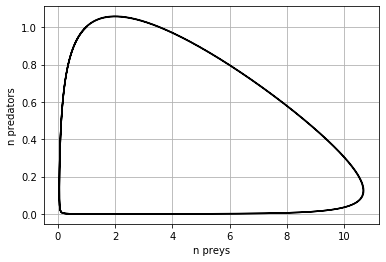

In [7]:
biome = Biome(tmax=10)
biome.run(2, 16, 2, 4)
biome.plot()
biome.plot_cycle()

Увеличение смертности жертв приводит к тому, что даже небольшое увеличение популяции хищников резко убивает почти всех жертв.
Далее увеличим 𝛾 в несколько раз (в 4 раза).

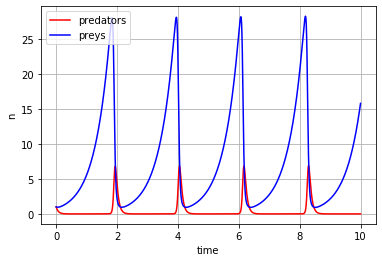

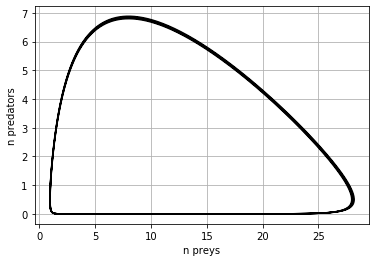

In [8]:
biome = Biome(tmax=10)
biome.run(2, 4, 2, 16)
biome.plot()
biome.plot_cycle()

При увеличении смертности хищников их количество растёт медленнее, что приводит к сильному увеличению количества жертв, а также к быстрейшему вымиранию после резкого падения количества жертв.
Далее увеличим 𝛿 в несколько раз (в 4 раза).

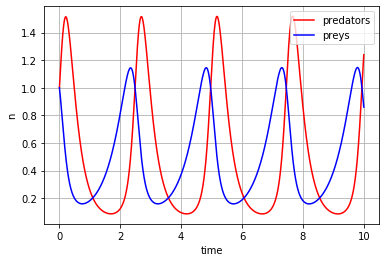

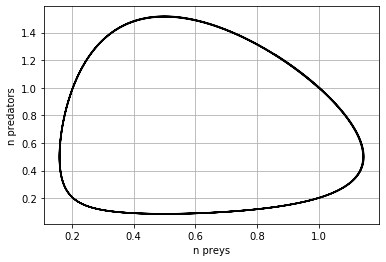

In [9]:
biome = Biome(tmax=10)
biome.run(2, 4, 8, 4)
biome.plot()
biome.plot_cycle()

При увеличении прироста хищников их пиковое количество становится гораздо больше.

Возьмём в качестве критерия устойчивости следующее: пусть количество жертв будет находится в пределах от 2 до 12, а количество хищников меньше 10 и при этом соотношение жертв к хищникам не превышало 3. Отсюда следует что на графике количества жертв и хищников появляется следующая область определения:

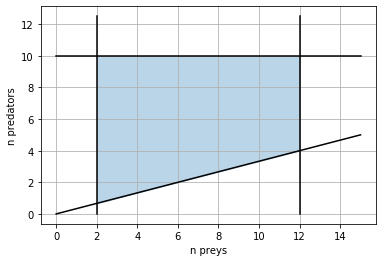

In [10]:
def x_y(x, a, b):
    return x*a + b

x = np.linspace(0., 15., 200, endpoint=True)
y = np.linspace(0., 12.5, 200, endpoint=True)
x_m = np.linspace(2., 12., 200, endpoint=True)

y1 = [0]*200
y1_m = [0]*200
i=0
for i in range(200):
    y1[i] = x_y(x[i], 1/3, 0)
    y1_m[i] = x_y(x_m[i], 1/3, 0)
x1 = [2]*200
x2 = [12]*200
y2 = [10]*200
y2_m = y2

plt.ylabel('n predators')
plt.xlabel('n preys')
plt.plot(x, y1, color='black')
plt.plot(x1, y, color='black')
plt.plot(x2, y, color='black')
plt.plot(x, y2, color='black')
plt.fill_between(x_m, y1_m, y2_m, where=(y1 < y2), color='C0', alpha=0.3,
                 interpolate=True)
plt.grid()
plt.show()

Дальше следует найти значения коэффициентов. Так как при увеличении всех коэффициентов у нас увеличивается амплитуда колебаний, потому уменьшим коэффициенты. Следующая программа (невероятно неэффективная) позволяет перебором найти значения подходящие под условие:

In [ ]:
a1 = []
b1 = []
c1 = []
d1 = []
e1 = []
f1 = []

for a in range(4, 24, 2):
    for b in range(2, 20, 2):
        for c in range(1, 90, 10):
            print(a,b,c)
            for d in range(1, 90, 10):
                for e in range(1, 90, 10):
                    for f in range(1,90,10):
                        biome = Biome(pred_init=b/2., prey_init=a/2., tmax=40, dt=0.001)
                        biome.run(c/100., d/100., e/100., f/100.)
                        h = 0
                        if (max(biome.pred) <= 10) and (max(biome.prey) <= 12) and (min(biome.prey) >= 2):
                            for i in range(len(biome.pred)):
                                if(biome.pred[i]<biome.prey[i]/3.):
                                    h+=1
                            if h == 0:
                                a1.append(a)
                                b1.append(b)
                                c1.append(c)
                                d1.append(d)
                                e1.append(e)
                                f1.append(f)

Насколько бы ужасной она не выглядела за ~3 часа времени она нашла 278 подходящих решения. Вот одно из них x = 3, y = 9, 𝛼 = 0.81, 𝛽 = 0.11, 𝛾 = 0.81, 𝛿 = 0.31.

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


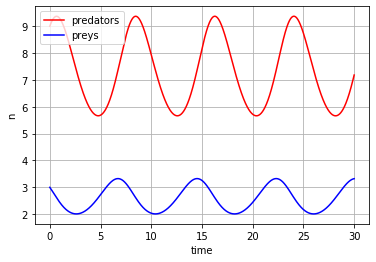

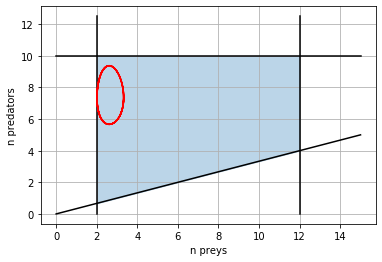

In [26]:
biome = Biome(pred_init=9, prey_init=3, tmax=30)
biome.run(0.81, 0.11, 0.31, 0.81)
biome.plot()

plt.ylabel('n predators')
plt.xlabel('n preys')
plt.plot(x, y1, color='black')
plt.plot(x1, y, color='black')
plt.plot(x2, y, color='black')
plt.plot(x, y2, color='black')
plt.plot(biome.prey, biome.pred, color='red')
plt.fill_between(x_m, y1_m, y2_m, where=(y1 < y2), color='C0', alpha=0.3,
                 interpolate=True)
plt.grid()
plt.show()

 Метод нахождения подбором явно не самый оптимальный, однако решение всё же находит.
 
 После проделанной лаборатной работы можно сделать несколько выводов. Во-первых, модель Лотки-Вольтерры очень чувствительна к коэффициентам, которые включены в неё. Во-вторых, поиск значений перебором не самая разумная вещь.